# Angle subtended on the slicer by each MRS detector pixel in each spectral band

The angle subtended by each pixel on the sky depends on the distortion affecting the pixel. It also depends on the MRS spectral channel. The four MRS channels have different field of view extents.

In [1]:
import funcs

import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# Define paths to data
workDir   = '/Users/ioannisa/Desktop/python/miri_devel/'
cdpDir    = workDir+'cdp_data/'
d2cMapDir = workDir+'notebooks/distortionMaps/'
incidAngleMapDir = workDir+'incidenceAngleMaps/'

In [3]:
sliceMap,incidenceAngleMap,xpos = {},{},{}
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    # Load slice mask extension of distortion map
    d2cMaps = funcs.load_obj('d2cMaps_band{}_tr80pc'.format(band),path=d2cMapDir)
    sliceMap[band]   = d2cMaps['sliceMap']
    ypos,xpos[band] = funcs.detpixel_trace(band,d2cMaps,sliceID=d2cMaps['nslices']/2,alpha_pos=0.)
    # Load incidence angle maps from Zemax models
    filename = 'ch{}_zm_c_2010.fits'.format(band.lower())
    incidenceAngleMap[band] = fits.open(incidAngleMapDir+filename)[0].data[6,:,:]

<IPython.core.display.Javascript object>


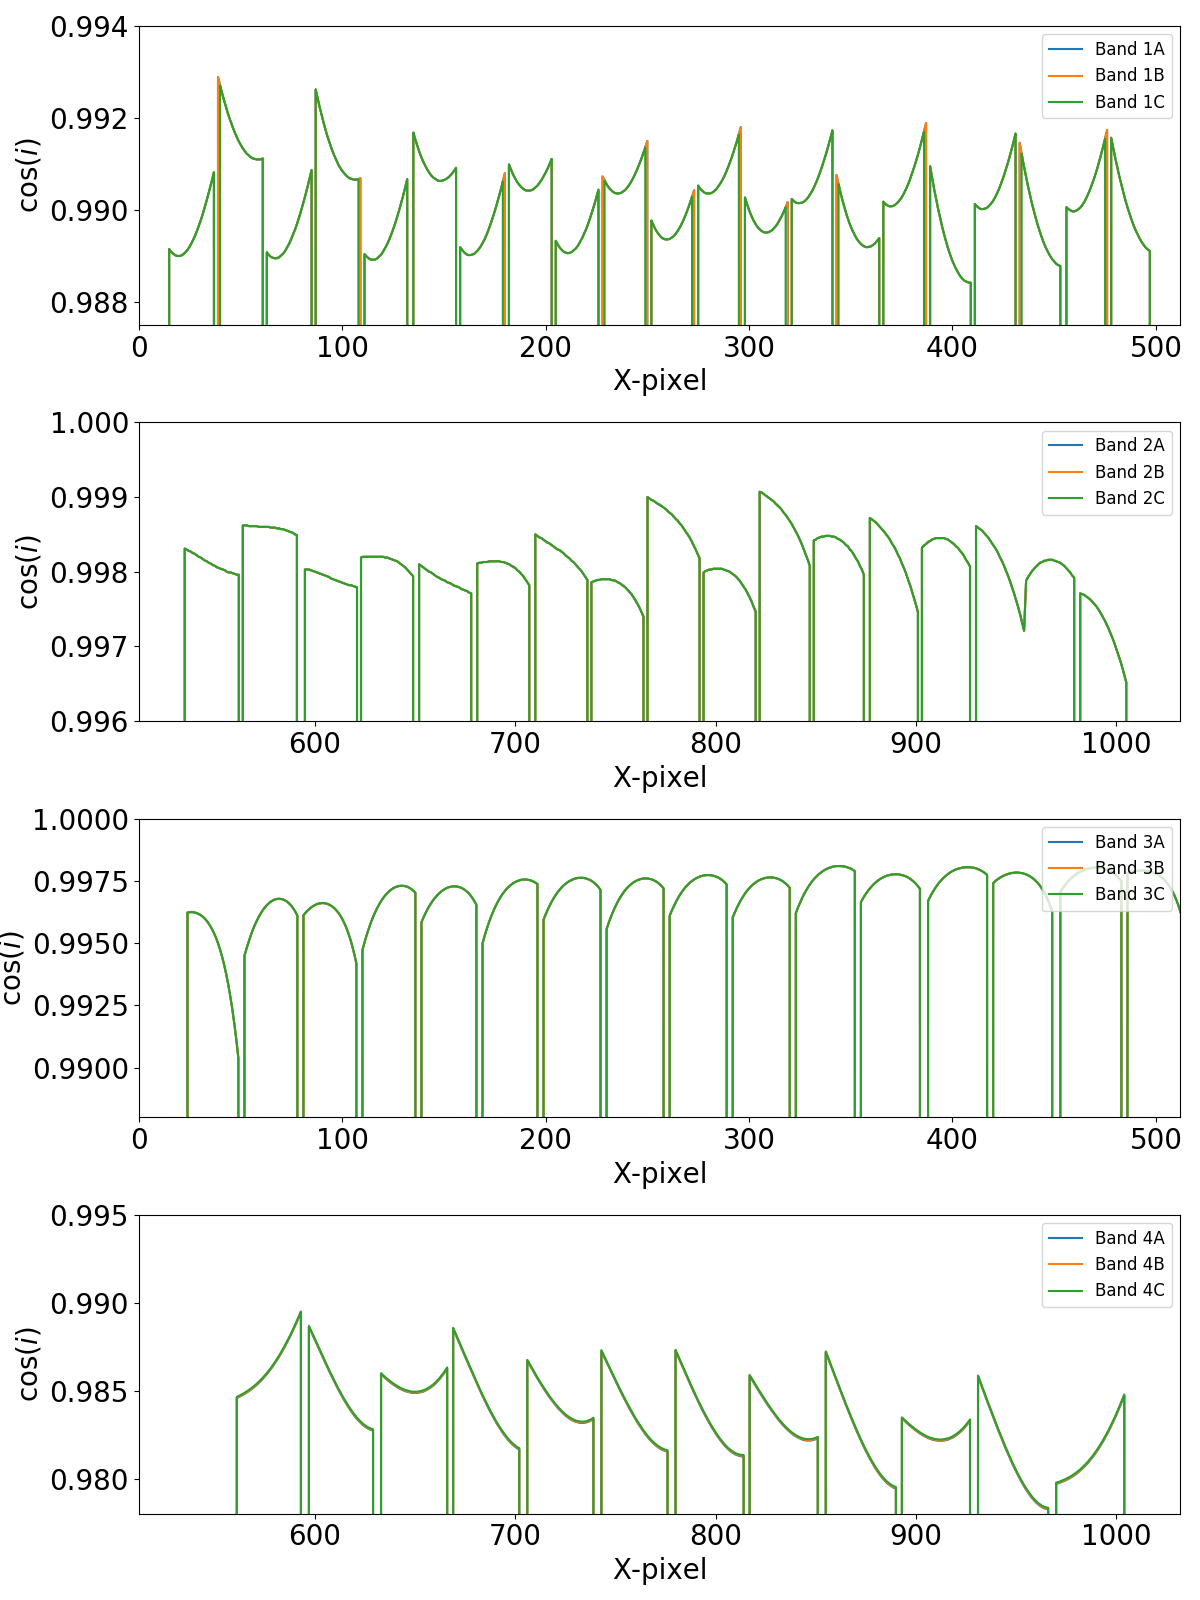

<IPython.core.display.Javascript object>


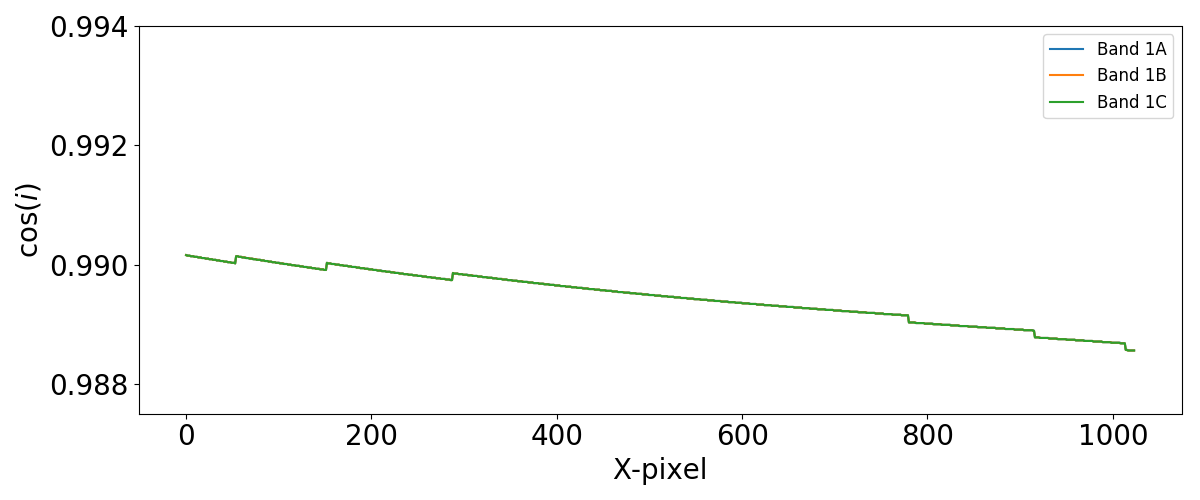

In [4]:
fig,axs = plt.subplots(4,1,figsize=(12,16))
for band in ['1A','1B','1C']:
    axs[0].plot(incidenceAngleMap[band][512,:],label='Band {}'.format(band))
    axs[0].set_xlim(0,512)
    axs[0].set_ylim(0.9875,0.994)
for band in ['2A','2B','2C']:
    axs[1].plot(incidenceAngleMap[band][512,:],label='Band {}'.format(band)) 
    axs[1].set_xlim(512,1032)
    axs[1].set_ylim(0.996,1)
for band in ['3A','3B','3C']:
    axs[2].plot(incidenceAngleMap[band][512,:],label='Band {}'.format(band))
    axs[2].set_xlim(0,512)
    axs[2].set_ylim(0.988,1)
for band in ['4A','4B','4C']:
    axs[3].plot(incidenceAngleMap[band][512,:],label='Band {}'.format(band))
    axs[3].set_xlim(512,1032)
    axs[3].set_ylim(0.978,0.995)
for plot in range(4):
    axs[plot].set_xlabel('X-pixel',fontsize=20)
    axs[plot].set_ylabel(r'cos($i$)',fontsize=20)
    axs[plot].legend(loc='upper right',fontsize=12)
    axs[plot].tick_params(axis='both',labelsize=20)
plt.tight_layout()

plt.figure(figsize=(12,5))
for band in ['1A','1B','1C']:
    plt.plot(incidenceAngleMap[band][ypos,xpos['1A']],label='Band {}'.format(band))
plt.ylim(0.9875,0.994)
plt.xlabel('X-pixel',fontsize=20)
plt.ylabel(r'cos($i$)',fontsize=20)
plt.legend(loc='upper right',fontsize=12)
plt.tick_params(axis='both',labelsize=20)
plt.tight_layout()

In [7]:
print np.arccos(0.99056)*180./np.pi
print np.arccos(0.98908)
print np.arccos(0.9)
print (np.arccos(0.98856)-np.arccos(0.990161))*180./np.pi
print np.cos(np.arccos(0.98908)-np.arccos(0.99056))

7.87890502177
0.147918440217
0.451026811796
0.630962406277
0.999945862169
